# PROBLEM STATEMENT:


In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours he/she has studied.


# Importing all the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cutecharts.charts as ctc


Import the CSV file:

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Scatter Plot between the score and number of hours studied:

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df['Scores'].isnull().sum()

0

In [9]:
df['Hours'].isnull().sum()

0

In [10]:
chart=ctc.Scatter('Score Prediction',width='500px',height='400px')
chart.set_options(x_label='Hours Studied',y_label='Score Obtained',is_show_line=False,dot_size=1,colors=['#1EAFAE'])
chart.add_series('Prediction',[(z[0],z[1]) for z in zip(df['Hours'],df['Scores'])])
chart.render_notebook()

Dividing the dataframe into 'attributes' and 'labels':

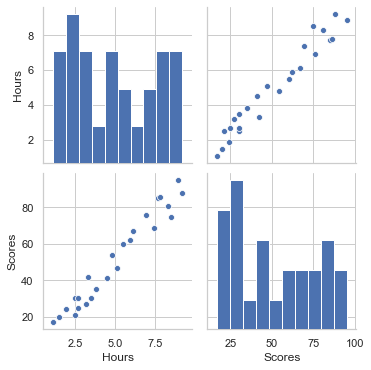

In [11]:
sns.set(style='whitegrid')
sns.pairplot(df)

In [12]:
x=df.drop('Scores',axis=1)

In [13]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
y=df.Scores

In [15]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Training the model:

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2, random_state=0)

In [17]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


Regression Technique:

In [18]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9454906892105356

Plotting the Regression Line:

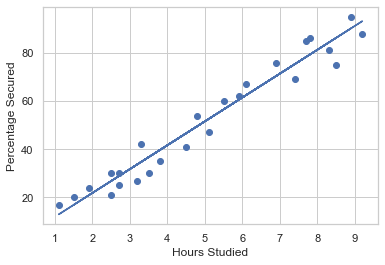

In [19]:
Reg_line=lr_clf.coef_*x + lr_clf.intercept_
plt.scatter(x,y)
plt.plot(x,Reg_line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Secured')
plt.show()

In [20]:
lr_clf.predict(x_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
y_pred=lr_clf.predict(x_test)

In [22]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [23]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [24]:
result.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


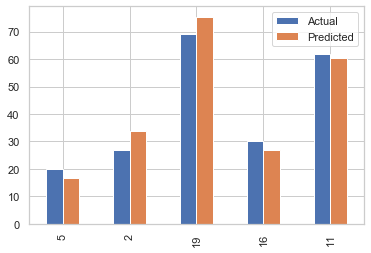

In [25]:
result.plot(kind='bar',label='Actual')

In [26]:
chart1=ctc.Line('Actual Score',width='500px',height='400px')
chart1.set_options(labels=list(y_test),x_label='Hours Studied',y_label='Scores')
chart1.add_series('Actual',list(y_test))
chart1.add_series('Predicted',list(y_pred))
chart1.render_notebook()

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,lr_clf.predict(x_test))) 

Mean Absolute Error: 4.183859899002975


In [28]:
def Predict_Score(Hours):
    s=np.zeros(len(x.columns))
    s[0]=Hours
    return lr_clf.predict([s])[0]

In [29]:
Predict_Score(9.25)

93.69173248737538

In [30]:
Predict_Score(9)

91.21406836721481